In [2]:
# Import required module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_patient = pd.read_csv('patient.csv',index_col=0)

display(df_patient)


,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
patient_id,,,,,,,,,,
1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan
...,...,...,...,...,...,...,...,...,...,...
889,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
890,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
891,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN


In [4]:
df_patient.describe(include='all')

,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
count,156,156.000000,156,156,166,27.000000,893,5,4,17
unique,2,NaN,2,10,3,NaN,20,3,2,4
top,male,NaN,indonesia,DKI Jakarta,isolated,NaN,24-Mar-20,11-Mar-20,11-Mar-20,RSPI Sulianti Saroso
freq,91,NaN,147,124,143,NaN,106,2,2,8
mean,NaN,48.108974,NaN,NaN,NaN,30.555556,NaN,NaN,NaN,NaN
std,NaN,16.627833,NaN,NaN,NaN,36.051601,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,36.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,49.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,59.000000,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,NaN


In [5]:
df_patient.dtypes

gender             object
age               float64
nationality        object
province           object
current_state      object
contacted_with    float64
confirmed_date     object
released_date      object
deceased_date      object
hospital           object
dtype: object

In [6]:
df_patient.isnull().sum()

gender            737
age               737
nationality       737
province          737
current_state     727
contacted_with    866
confirmed_date      0
released_date     888
deceased_date     889
hospital          876
dtype: int64

In [7]:
# Take only required column

# df_patient = df_patient[[
#     'gender',
#     'age',
#     'nationality',
#     'province',
#     'current_state',
#     'confirmed_date',
#     'released_date',
#     'deceased_date'
# ]]
df_patient = df_patient[[
    'gender',
    'age',
    'current_state',
    'confirmed_date',
]]
df_patient['confirmed_date'] = pd.to_datetime(df_patient['confirmed_date'])

bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
df_patient['age_group'] = pd.cut(df_patient['age'], bins=bins, labels=labels, right=False)

# df_patient['age'].value_counts().to_dict()

display(df_patient)
df_patient.describe(include='all')

,gender,age,current_state,confirmed_date,age_group
patient_id,,,,,
1,female,31.0,released,2020-03-02,30-39
2,female,64.0,released,2020-03-02,60-69
3,female,33.0,released,2020-03-06,30-39
4,female,34.0,isolated,2020-03-06,30-39
5,male,55.0,isolated,2020-03-08,50-59
...,...,...,...,...,...
889,NaN,NaN,NaN,2020-03-26,NaN
890,NaN,NaN,NaN,2020-03-26,NaN
891,NaN,NaN,NaN,2020-03-26,NaN


,gender,age,current_state,confirmed_date,age_group
count,156,156.000000,166,893,156
unique,2,NaN,3,20,9
top,male,NaN,isolated,2020-03-24 00:00:00,50-59
freq,91,NaN,143,106,38
first,NaN,NaN,NaN,2020-03-02 00:00:00,NaN
last,NaN,NaN,NaN,2020-03-26 00:00:00,NaN
mean,NaN,48.108974,NaN,NaN,NaN
std,NaN,16.627833,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,NaN
25%,NaN,36.000000,NaN,NaN,NaN


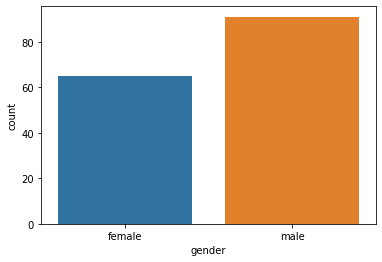

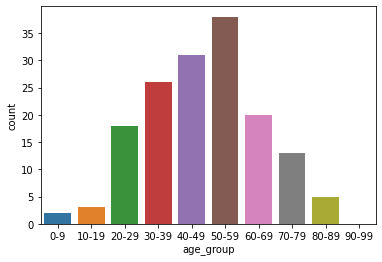

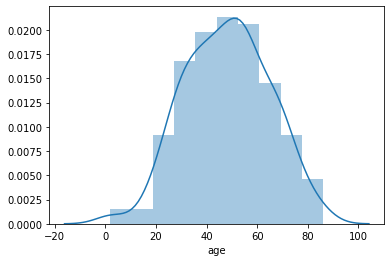

In [8]:
sns.countplot(x='gender',data=df_patient)
plt.show()

sns.countplot(x='age_group',data=df_patient)
plt.show()

sns.distplot(df_patient['age'])
plt.show()

C:\Users\marfa\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


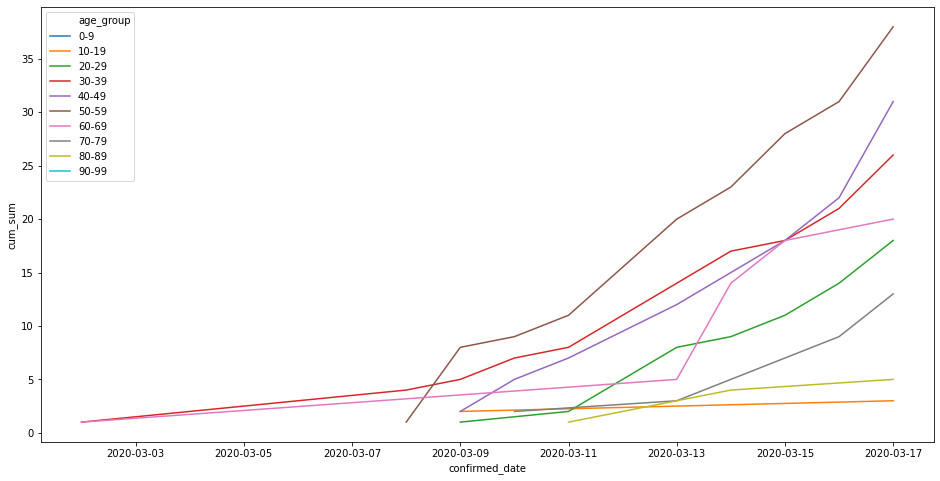

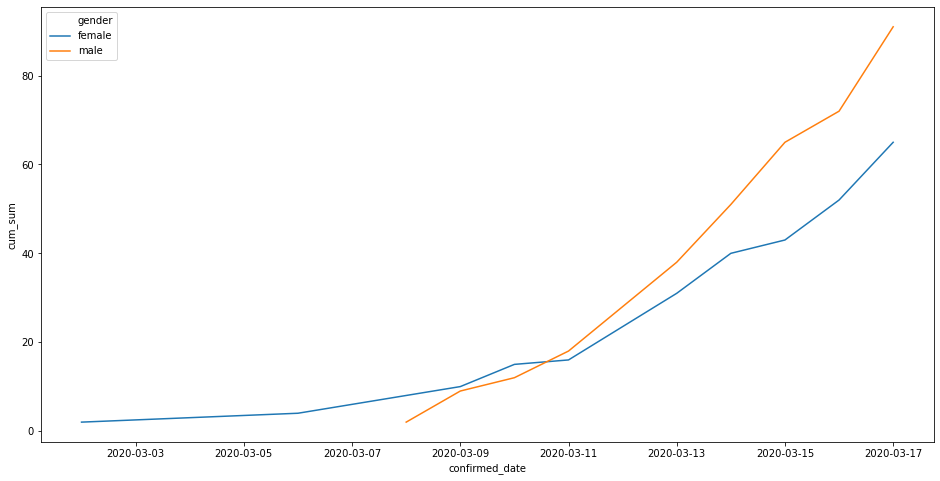

In [9]:
time_age = df_patient.groupby(['confirmed_date','age_group']).size().reset_index(name='count')
time_age['cum_sum'] = time_age.groupby(['age_group'])['count'].cumsum()
time_age['cum_perc'] = 100*time_age['cum_sum']/time_age['count'].sum()

plt.figure(figsize=(16,8))
sns.lineplot(x='confirmed_date',y='cum_sum',hue_order=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'],hue='age_group',data=time_age)
plt.show()

time_gender = df_patient.groupby(['confirmed_date','gender']).size().reset_index(name='count')
time_gender['cum_sum'] = time_gender.groupby(['gender'])['count'].cumsum()
time_gender['cum_perc'] = 100*time_gender['cum_sum']/time_gender['count'].sum()

plt.figure(figsize=(16,8))
sns.lineplot(x='confirmed_date',y='cum_sum',hue='gender',data=time_gender)
plt.show()

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

for age_group in time_age['age_group'].unique():
    print(age_group)
    df_log = time_age.loc[time_age['age_group']==age_group]

    if len(df_log) > 2:
        FMT = '%Y-%m-%d %H:%M:%S'
        date = df_log['confirmed_date']
        df_log['confirmed_date'] = date.map(lambda x : (x - datetime.strptime("2020-01-01 00:00:00", FMT)).days)

        # display(df_log)

        def logistic_model(x,a,b,c):
            return c/(1+np.exp(-(x-b)/a))

        x = list(df_log['confirmed_date'])
        y = list(df_log['cum_sum'])

        p0 = np.random.exponential(size=3)

        bounds = (0, [100000.,3.,1000000000.])

        fit = curve_fit(logistic_model,x,y,p0=[2,100,20000])
        # fit = curve_fit(logistic_model,x,y,bounds=bounds,p0=p0)

        print('fit: ')
        print(fit)
        a = fit[0][0]
        b = fit[0][1]
        c = fit[0][2]

        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        print('errors')
        print(errors)

        sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
        print('sol')
        print(sol)

        pred_x = list(range(max(x),sol))
        plt.rcParams['figure.figsize'] = [7, 7]
        plt.rc('font', size=14)
        # Real data
        # plt.scatter(x,y,label="Real data",color="red")
        # Predicted logistic curve
        plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label=age_group)
        # Predicted exponential curve
        # plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
        plt.legend()
        plt.xlabel("Days since 1 January 2020")
        plt.ylabel("Total number of infected people")
        # plt.ylim((min(y)*0.9,c*1.1))
        
        y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]
        mean_squared_error(y,y_pred_logistic)
plt.show()
# def exponential_model(x,a,b,c):
#     return a*np.exp(b*(x-c))
# exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1])

30-39
fit: 
(array([5.33359246e+00, 1.53449983e+02, 5.34281627e+07]), array([[1.78021001e+00, 6.28924134e+06, 6.30400820e+13],
       [6.28924134e+06, 2.34558418e+13, 2.35109202e+20],
       [6.30400820e+13, 2.35109202e+20, 2.35661281e+27]]))
errors
[1.3342451091672833, 4843123.140703403, 48544956538334.945]
sol
250
60-69
fit: 
(array([ 0.52273467, 72.53936215, 19.49005974]), array([[0.00509997, 0.00100325, 0.01773974],
       [0.00100325, 0.0061328 , 0.02014547],
       [0.01773974, 0.02014547, 0.26207357]]))
errors
[0.071414039691356, 0.07831220229908704, 0.5119312136587517]
sol
74
50-59
fit: 
(array([ 2.746968  , 73.5399935 , 51.84763128]), array([[  0.26648894,   0.65060342,   5.41890576],
       [  0.65060342,   1.87469758,  15.56093011],
       [  5.41890576,  15.56093011, 131.35504147]]))
errors
[0.516225671423218, 1.3691959619163463, 11.461022705988187]
sol
84
10-19
20-29
fit: 
(array([3.77557929e+00, 1.28217479e+02, 1.86640714e+07]), array([[3.95559737e+00, 6.40249275e+06, 3.1

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

female
C:\Users\marfa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,confirmed_date,gender,count,cum_sum,cum_perc
0,61,female,2,2,1.282051
1,65,female,2,4,2.564103
3,68,female,6,10,6.410256
5,69,female,5,15,9.615385
7,70,female,1,16,10.256410
9,72,female,15,31,19.871795
11,73,female,9,40,25.641026
13,74,female,3,43,27.564103
15,75,female,9,52,33.333333
17,76,female,13,65,41.666667


fit: 
(array([  3.31530789,  75.85317034, 124.24817268]), array([[2.11889701e-01, 8.30007489e-01, 1.60673447e+01],
       [8.30007489e-01, 3.57573003e+00, 7.02196261e+01],
       [1.60673447e+01, 7.02196261e+01, 1.38731839e+03]]))
errors
[0.46031478423166494, 1.8909600805405353, 37.24672322084691]
sol
96
male
C:\Users\marfa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,confirmed_date,gender,count,cum_sum,cum_perc
2,67,male,2,2,1.282051
4,68,male,7,9,5.769231
6,69,male,3,12,7.692308
8,70,male,6,18,11.538462
10,72,male,20,38,24.358974
12,73,male,13,51,32.692308
14,74,male,14,65,41.666667
16,75,male,7,72,46.153846
18,76,male,19,91,58.333333


fit: 
(array([  2.15933199,  73.6887356 , 118.76891451]), array([[5.25490583e-02, 1.14946884e-01, 2.70905232e+00],
       [1.14946884e-01, 3.18674995e-01, 7.39905646e+00],
       [2.70905232e+00, 7.39905646e+00, 1.76660205e+02]]))
errors
[0.2292358136803868, 0.5645130599714484, 13.291358283066655]
sol
84


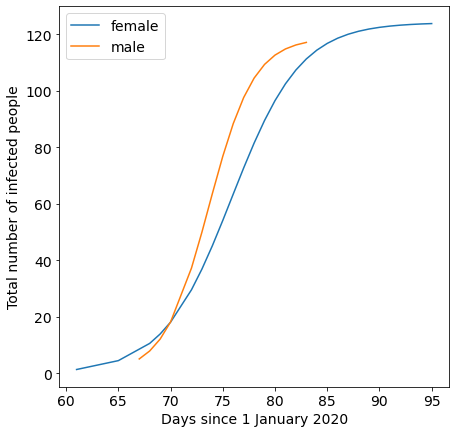

In [11]:
for gender in time_gender['gender'].unique():
    print(gender)
    df_log = time_gender.loc[time_gender['gender']==gender]

    if len(df_log) > 2:
        FMT = '%Y-%m-%d %H:%M:%S'
        date = df_log['confirmed_date']
        df_log['confirmed_date'] = date.map(lambda x : (x - datetime.strptime("2020-01-01 00:00:00", FMT)).days)

        display(df_log)

        def logistic_model(x,a,b,c):
            return c/(1+np.exp(-(x-b)/a))

        x = list(df_log['confirmed_date'])
        y = list(df_log['cum_sum'])

        p0 = np.random.exponential(size=3)

        bounds = (0, [100000.,3.,1000000000.])

        fit = curve_fit(logistic_model,x,y,p0=[2,100,20000])
        # fit = curve_fit(logistic_model,x,y,bounds=bounds,p0=p0)

        print('fit: ')
        print(fit)
        a = fit[0][0]
        b = fit[0][1]
        c = fit[0][2]

        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        print('errors')
        print(errors)

        sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
        print('sol')
        print(sol)

        pred_x = list(range(max(x),sol))
        plt.rcParams['figure.figsize'] = [7, 7]
        plt.rc('font', size=14)
        # Real data
        # plt.scatter(x,y,label="Real data",color="red")
        # Predicted logistic curve
        plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label=gender)
        # Predicted exponential curve
        # plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
        plt.legend()
        plt.xlabel("Days since 1 January 2020")
        plt.ylabel("Total number of infected people")
        # plt.ylim((min(y)*0.9,c*1.1))
        
        y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]
        mean_squared_error(y,y_pred_logistic)
plt.show()